In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.interpolate import interp1d

print(os.getcwd())
# os.chdir('../')
# print(os.getcwd())

/Users/bb320/Library/CloudStorage/GoogleDrive-burint@bnmanalytics.com/My Drive/Imperial/01_Projects/TeamofRivals/Analysis/Con2vec-1/Python
/Users/bb320/Library/CloudStorage/GoogleDrive-burint@bnmanalytics.com/My Drive/Imperial/01_Projects/TeamofRivals/Analysis/Con2vec-1


In [19]:
df = pd.read_csv(os.path.join('Output', 'Clustering', 'Segmented_Conversations_With_Conflicts.csv'))
list(df)

['Pair_Speaker_turn',
 'PairID',
 'PersonID',
 'Speaker',
 'Speaker_original',
 'Turn',
 'Word',
 'Start Time',
 'End Time',
 'Backchannel',
 'Overlap',
 'Contested',
 'Duration',
 'Sentiment',
 'word_count',
 'MergeKey',
 'Cluster',
 'word_count_scaled',
 'Sentiment_scaled',
 'Contested_scaled',
 'StageCluster',
 'Stage']

In [20]:
# Group by 'Speaker' and 'Turn' and perform aggregations
df_agg = df.groupby(['Cluster', 'Speaker', 'Turn']).agg(
    avg_word_count=('word_count', 'mean'),
    avg_sentiment=('Sentiment', 'mean'),
    avg_backchannels=('Backchannel', 'mean'),
    avg_overlaps=('Overlap', 'mean'),
    avg_contested=('Contested', 'mean')
).reset_index()

df_agg

,Cluster,Speaker,Turn,avg_word_count,avg_sentiment,avg_backchannels,avg_overlaps,avg_contested
0,Constructive Disagreement,A,1,4.230769,0.207692,0.076923,0.000000,0.000000
1,Constructive Disagreement,A,2,9.500000,0.028194,0.100000,0.019651,0.007151
2,Constructive Disagreement,A,3,26.857143,0.110828,0.142857,0.004640,0.004640
3,Constructive Disagreement,A,4,30.700000,0.159074,0.100000,0.001860,0.001860
4,Constructive Disagreement,A,5,29.933333,0.204931,0.200000,0.000980,0.000980
...,...,...,...,...,...,...,...,...
779,Oppositional Impasse,Both,144,2.000000,0.000000,0.000000,0.000000,1.000000
780,Oppositional Impasse,Both,145,6.500000,0.029167,0.000000,0.619048,1.000000
781,Oppositional Impasse,Both,147,1.000000,0.000000,0.000000,1.000000,1.000000
782,Oppositional Impasse,Both,150,10.500000,0.250000,0.000000,0.759091,1.000000


In [34]:
df_agg1 = df_agg[df_agg['Cluster'] == 'Constructive Disagreement']
# df_agg1= df_agg1.groupby(['Speaker', 'Turn']).mean().reset_index()
df_agg1.to_clipboard()

ValueError: Expect x to not have duplicates

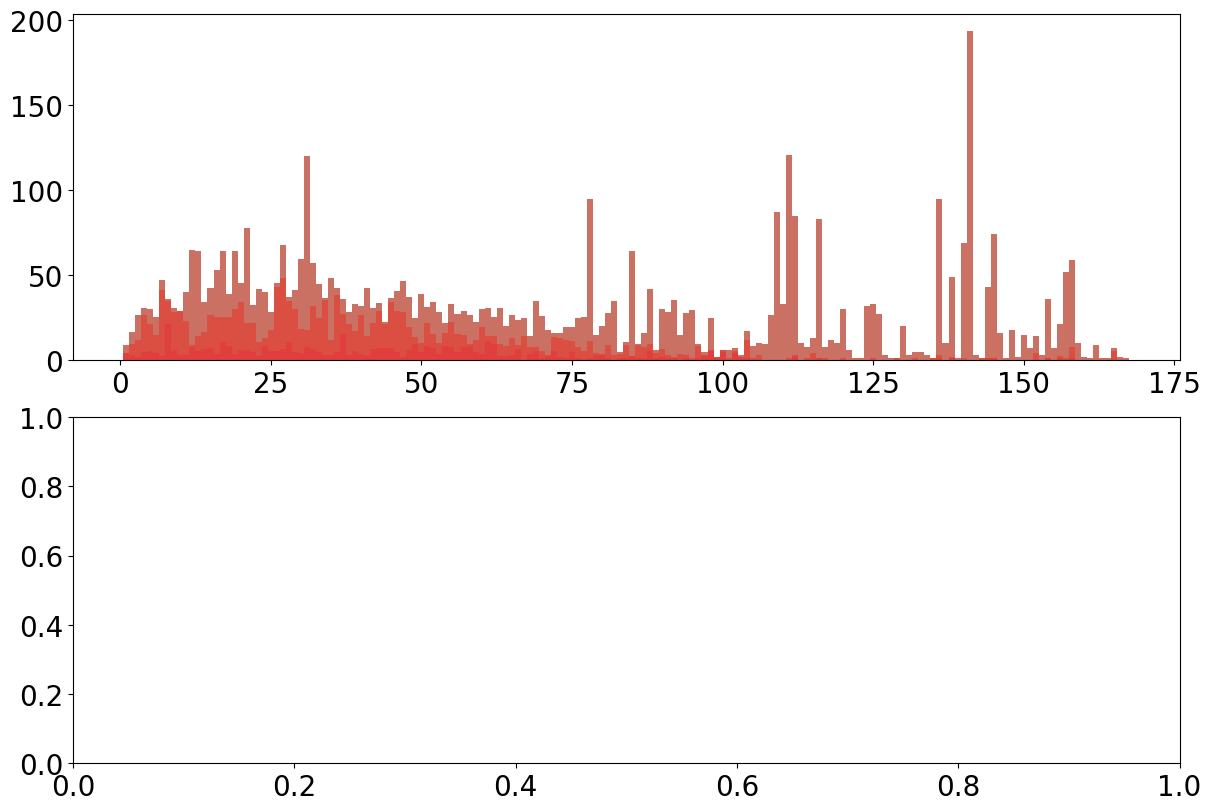

In [35]:

# Initialize a figure
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', figsize=(12, 8))
# Set a modern color palette for two speakers
speaker_palette = ["#0e86d4", "#fd7f20", "#db1f48"]

# Increase font sizes for readability
plt.rcParams.update({'font.size': 20})

x_var = 'Turn'

ax1.bar(
        df_agg1[x_var], 
        df_agg1['avg_word_count'],
        align = 'center',
        width = 1,
        edgecolor='none',
        label="Speaker A",
        color=speaker_palette[0],
        alpha = .6
    )
    
ax1.bar(
        df_agg1[x_var], 
        df_agg1['avg_word_count'],
        align = 'center',
        width = 1,
        edgecolor='none',
        label="Speaker B",
        color=speaker_palette[1],
        alpha = .6
    )

ax1.bar(
        df_agg1[x_var], 
        df_agg1['avg_word_count'],
        align = 'center',
        # width = turn_speaker_data_Both['Turn_duration'],
        width = 1,
        edgecolor='none',
        label="Speaker A & B",
        alpha = .3,
        hatch='//', color = '#db1f48', facecolor = '#db1f48'
    )

x_new = np.linspace(df_agg1[x_var].min(), df_agg1[x_var].max(),500)
f = interp1d(df_agg1[x_var], df_agg1['avg_sentiment'], kind='quadratic')
y_smooth=f(x_new)

ax2.plot(x_new,
            y_smooth,
            label="Sentiment",
            color='#4C1F7A',
            linewidth=2)

ax3 = ax2.twinx()
    
ax2.fill_between(df_agg1[x_var], df_agg1['mean_contested'],
            label='Contested',
            alpha=0.3, step='mid', hatch='//', color = '#db1f48', facecolor = '#db1f48')
    
 # Customize the plot
fig.title('Conversational Dynamics by Speaker', pad=100)
ax2.set_xlabel(x_var, fontsize = 20)
ax1.set_ylabel('Word Count (log-scale)', fontsize = 20)
ax1.set_yscale('log')
ax1.margins(x=0)
ax2.set_ylabel('Sentiment', fontsize = 20)
ax2.margins(x=0)
ax3.set_ylabel('Overlapping \nSpeakers', fontsize = 20)
ax3.set_yticklabels([])
ax3.set_yticks([])
ax3.margins(x=0)
ax2.set_ylim(-1.2, 1.2)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
fig.legend(loc='upper center',
        #    bbox_to_anchor=(.5, 1.05),
            ncol=4,
            frameon=False)

# Remove grid lines for a cleaner look
plt.grid(False)

# Show the plot
plt.tight_layout()
fig.subplots_adjust(top=0.85)